In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [18]:
df = pd.read_csv('suicidios y muertes accidentales.csv', sep=';', thousands='.')

In [19]:
df.drop(['Sexo', 'Edad'], axis=1, inplace=True)

In [20]:
df

,Causa de muerte,Periodo,Total
0,097 Otros accidentes,2018,2101
1,097 Otros accidentes,2017,1981
2,097 Otros accidentes,2016,2502
3,097 Otros accidentes,2015,2263
4,097 Otros accidentes,2014,1991
5,097 Otros accidentes,2013,1918
6,097 Otros accidentes,2012,1842
7,097 Otros accidentes,2011,2624
8,097 Otros accidentes,2010,2519
9,097 Otros accidentes,2009,2179


In [21]:
df['Causa de muerte'] = df['Causa de muerte'].str.extract('\s(\D*)')

In [22]:
df['Causa de muerte'] = df['Causa de muerte'].map(str.strip)

In [23]:
df_otros = df[df['Causa de muerte'] == 'Otros accidentes']

In [24]:
df_suicidios = df[df['Causa de muerte'] != 'Otros accidentes']

In [25]:
#df.to_csv('Suicidios-accidentes-bien.csv')

In [9]:
dftotal = pd.merge(df_suicidios, df_otros, left_on='Periodo', right_on='Periodo')

In [10]:
dftotal

,Causa de muerte_x,Periodo,Total_x,Causa de muerte_y,Total_y
0,Suicidio y lesiones autoinfligidas,2018,3.539,Otros accidentes,2.101
1,Suicidio y lesiones autoinfligidas,2017,3.679,Otros accidentes,1.981
2,Suicidio y lesiones autoinfligidas,2016,3.569,Otros accidentes,2.502
3,Suicidio y lesiones autoinfligidas,2015,3.602,Otros accidentes,2.263
4,Suicidio y lesiones autoinfligidas,2014,3.910,Otros accidentes,1.991
5,Suicidio y lesiones autoinfligidas,2013,3.870,Otros accidentes,1.918
6,Suicidio y lesiones autoinfligidas,2012,3.539,Otros accidentes,1.842
7,Suicidio y lesiones autoinfligidas,2011,3.180,Otros accidentes,2.624
8,Suicidio y lesiones autoinfligidas,2010,3.158,Otros accidentes,2.519
9,Suicidio y lesiones autoinfligidas,2009,3.429,Otros accidentes,2.179


In [11]:
dftotal.rename(columns={'Total_x':'Suicidios', 'Total_y':'Otros'}, inplace=True)

In [12]:
dftotal = dftotal[['Periodo', 'Suicidios', 'Otros']]

In [13]:
dftotal.set_index('Periodo', inplace=True)

In [14]:
dftotal

,Suicidios,Otros
Periodo,,
2018,3.539,2.101
2017,3.679,1.981
2016,3.569,2.502
2015,3.602,2.263
2014,3.910,1.991
2013,3.870,1.918
2012,3.539,1.842
2011,3.180,2.624
2010,3.158,2.519


In [16]:
dftotal['Ratio'] = dftotal.mean(axis=1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
dftotal['Ratio'].mean()

2.923051282051282

In [18]:
dftotal['Ratio'].median()

2.8760000000000003

In [19]:
dftotal['Ratio'].std()

0.20657147338568832

In [20]:
dftotal['zscore'] = (dftotal['Ratio'] - dftotal['Ratio'].mean())/dftotal['Ratio'].std()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
dftotal

,Suicidios,Otros,Ratio,zscore
Periodo,,,,
2018,3.539,2.101,2.8200,-0.498865
2017,3.679,1.981,2.8300,-0.450456
2016,3.569,2.502,3.0355,0.544357
2015,3.602,2.263,2.9325,0.045741
2014,3.910,1.991,2.9505,0.132878
2013,3.870,1.918,2.8940,-0.140635
2012,3.539,1.842,2.6905,-1.125767
2011,3.180,2.624,2.9020,-0.101908
2010,3.158,2.519,2.8385,-0.409308


<IPython.core.display.Javascript object>


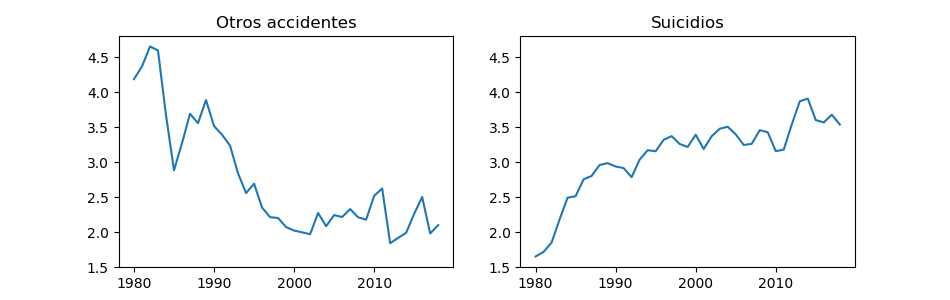

Text(0.5, 1.0, 'Suicidios')

In [22]:
plt.figure(figsize=(9.5,3))

ax2 = plt.subplot(1,2,1)
plt.plot(dftotal.index, dftotal['Otros'])
plt.title('Otros accidentes')

ax1 = plt.subplot(1,2,2, sharey=ax2)
plt.plot(dftotal.index, dftotal['Suicidios'])
plt.title('Suicidios')

# Es probable que antes de 1992 los sucidios no se computasen como tal y esas muertes estuviesen dentro del epígrafe 'Otros accidentes'. 
# Pearson y Spearman lo confirman con una correlación negativa de 0.8945 y 0.8566 respectivamente, y una p en ambos casos menor de 0.001.



In [23]:
stats.pearsonr(dftotal['Suicidios'], dftotal['Otros'])

(-0.8945177191109265, 1.671561026789929e-14)

In [24]:
stats.spearmanr(dftotal['Suicidios'], dftotal['Otros'])

SpearmanrResult(correlation=-0.8566222997963845, pvalue=3.503134150535795e-12)

<IPython.core.display.Javascript object>


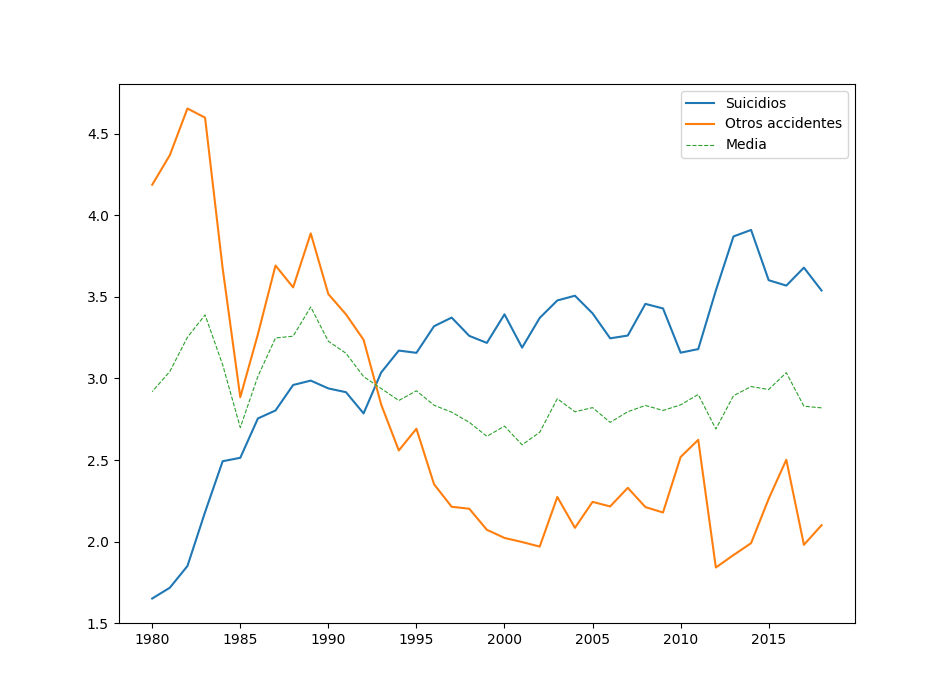

In [25]:
plt.figure(figsize=(9.5,7))
plt.plot(dftotal.index, dftotal['Suicidios'], label='Suicidios')
plt.plot(dftotal.index, dftotal['Otros'], label='Otros accidentes')
plt.plot(dftotal.index, dftotal['Ratio'], '--', label='Media', lw=0.8)
plt.legend()

In [38]:
dftotal.loc[2018]

Suicidios    3.539000
Otros        2.101000
Ratio        2.820000
zscore      -0.498865
Name: 2018, dtype: float64